# Data Exploration
## Dataset

In [2]:
import pandas as pd

df = pd.read_csv('../data/labels_int.csv')
df = df.sample(frac=1).reset_index(drop=True)
df.head(8)

,Unnamed: 0,seal_id,rec_name,rhonchus_l,rhonchus_r,whistling_l,whistling_r
0,49,PV19084,PV19084_070219,1,0,1,0
1,15,PV18261,PV18261_231218,0,0,1,1
2,47,PV19081,PV19081_050219,1,1,0,0
3,4,PV18244,PV18244_141218,1,1,0,1
4,24,PV19001,PV19001_010119,1,1,0,1
5,29,PV19009,PV19009_040119,1,0,1,1
6,56,PV19113,PV19113_280219,1,1,0,0
7,45,PV19078,PV19078_040219,0,0,0,1


## Distribution

1    31
0    24
3     9
2     8
Name: rhonchus_l, dtype: int64
0    42
1    30
Name: whistling_l, dtype: int64


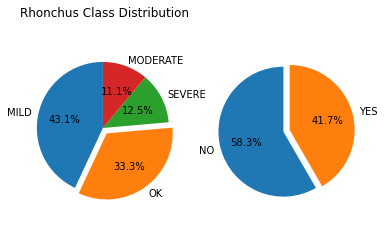

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
r_explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
w_explode = (0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

rhonchus_labels = ['MILD', 'OK', 'SEVERE', 'MODERATE']
whistling_labels = ['NO', 'YES']

fig, ax = plt.subplots(1, 2)

ax[0].pie(df.rhonchus_l.value_counts(), explode=r_explode, labels=rhonchus_labels, autopct='%1.1f%%',
          shadow=False, startangle=90)
ax[0].axis('equal')
ax[0].set_title("Rhonchus Class Distribution")

ax[1].pie(df.whistling_l.value_counts(), explode=w_explode, labels=whistling_labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax[1].axis('equal')

print(df.rhonchus_l.value_counts())
print(df.whistling_l.value_counts())


# Methodology
## Data Augmentation

In [6]:
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift
import numpy as np
import matplotlib.pyplot as plt
import librosa
from librosa import display

SAMPLE_RATE = 4000

augment = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_fraction=0.5, max_fraction=0.5, p=0.5)
])

fig, ax = plt.subplots()

y, sr = librosa.load("../data/recordings/PV21023/PV21023_R.wav", sr=None)

# Passing through arguments to the Mel filters
S = librosa.feature.melspectrogram(y=augment(y, 4000), sr=sr, n_mels=128, fmax=2000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, fmax=2000, ax=ax)

fig.colorbar(img, ax=ax, format='%+2.0f dB')

ax.set(title='Mel-frequency spectrogram')
plt.show()

OSError: cannot load library 'C:\Users\CRISTY\anaconda3\envs\tf\lib\site-packages\_soundfile_data\libsndfile64bit.dll': error 0x7e